In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
from sklearn.linear_model.coordinate_descent import ConvergenceWarning

import sklearn
from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

In [2]:
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

##### 1、读取数据

In [3]:
names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
path = "datas/boston_housing.data"

fd = pd.read_csv(path, header=None)

##### 2、数据处理 + 数据分割

In [4]:
def notEmpty(s):
    return s != ''

In [10]:
data = np.empty((len(fd), 14))
for i, d in enumerate(fd.values):
    d = map(float, filter(notEmpty, d[0].split(' ')))
    data[i] = list(d)

data[:2]

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
          0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
          6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
          2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
          4.98000000e+00,   2.40000000e+01],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
          7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
          9.14000000e+00,   2.16000000e+01]])

In [ ]:
# x_prime = data[names[:-1]]
# y = data[names[-1]]
x, y = np.split(data,(13,),axis=1)   # axis =1 按列分。默认是 = 0
y = y.ravel()

print ("样本数据量:%d, 特征个数：%d" % x.shape)
print ("target样本数据量:%d" % y.shape[0])

In [26]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=0.8, random_state=14)
x_train, x_test, y_train, y_test = x_train1, x_test1, y_train1, y_test1

print ("训练数据集样本数目：%d, 测试数据集样本数目：%d" % (x_train.shape[0], x_test.shape[0]))

训练数据集样本数目：404, 测试数据集样本数目：102


C:\4_IT\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


##### 3、数据预处理

In [27]:
ss = MinMaxScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

print ("原始数据各个特征属性的调整最小值:",ss.min_)
print ("原始数据各个特征属性的缩放数据值:",ss.scale_)

原始数据各个特征属性的调整最小值: [-7.10352762e-05  0.00000000e+00 -1.68621701e-02  0.00000000e+00
 -7.92181070e-01 -6.82314620e-01 -2.98661174e-02 -1.02719857e-01
 -4.34782609e-02 -3.56870229e-01 -1.34042553e+00 -6.38977636e-03
 -4.90780142e-02]
原始数据各个特征属性的缩放数据值: [1.12397589e-02 1.00000000e-02 3.66568915e-02 1.00000000e+00
 2.05761317e+00 1.91607588e-01 1.02986612e-02 9.09347180e-02
 4.34782609e-02 1.90839695e-03 1.06382979e-01 2.53562554e-03
 2.83687943e-02]


##### 4、回归树模型构建 + 模型训练 + 模型预测 + 模型评估

In [28]:
model = DecisionTreeRegressor(criterion='mae',max_depth=7)

model.fit(x_train, y_train)
y_test_hat = model.predict(x_test) 

In [29]:
score = model.score(x_test, y_test)
print ("Score：", score)

Score： 0.8142209971854149


##### ~~其他模型构建 以作对比

In [30]:
#构建线性回归
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_y_test_hat = lr.predict(x_test)
lr_score = lr.score(x_test, y_test)
print ("lr:", lr_score)

#构建lasso
lasso = LassoCV(alphas=np.logspace(-3,1,20))
lasso.fit(x_train, y_train)
lasso_y_test_hat = lasso.predict(x_test)
lasso_score = lasso.score(x_test, y_test)
print ("lasso:", lasso_score)

#构建岭回归
ridge = RidgeCV(alphas=np.logspace(-3,1,20))
ridge.fit(x_train, y_train)
ridge_y_test_hat = ridge.predict(x_test)
ridge_score = ridge.score(x_test, y_test)
print ("ridge:", ridge_score)

lr: 0.6177265992293741
lasso: 0.617887746021268
ridge: 0.620924773165199


C:\4_IT\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


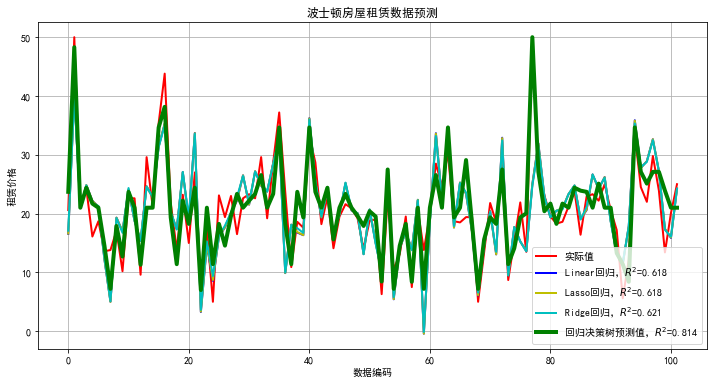

In [31]:
plt.figure(figsize=(12,6), facecolor='w')
ln_x_test = range(len(x_test))

plt.plot(ln_x_test, y_test, 'r-', lw=2, label='实际值')
plt.plot(ln_x_test, lr_y_test_hat, 'b-', lw=2, label='Linear回归，$R^2$=%.3f' % lr_score)
plt.plot(ln_x_test, lasso_y_test_hat, 'y-', lw=2, label='Lasso回归，$R^2$=%.3f' % lasso_score)
plt.plot(ln_x_test, ridge_y_test_hat, 'c-', lw=2, label='Ridge回归，$R^2$=%.3f' % ridge_score)
plt.plot(ln_x_test, y_test_hat, 'g-', lw=4, label='回归决策树预测值，$R^2$=%.3f' % score)
plt.legend(loc = 'lower right')

plt.xlabel('数据编码')
plt.ylabel('租赁价格')
plt.grid(True)
plt.title('波士顿房屋租赁数据预测')
plt.show()

# 参数优化

##### 1、管道准备 + 参数字典 + 数据分割

In [42]:
pipes = [
    Pipeline([
            ('mms', MinMaxScaler()),
            ('pca', PCA()),    # 降维
            ('decision', DecisionTreeRegressor(criterion='mse'))   # 训练模型为决策树模型
        ]),
    Pipeline([
            ('mms', MinMaxScaler()),
            ('decision', DecisionTreeRegressor(criterion='mse'))
        ]),
    Pipeline([
            ('decision', DecisionTreeRegressor(criterion='mse'))
        ])
]

parameters = [
    {
    "pca__n_components": [0.25,0.5,0.75,1],   # 降维百分比
    "decision__max_depth":  np.linspace(1,20,20).astype(np.int8)
    },
    {
    "decision__max_depth":  np.linspace(1,20,20).astype(np.int8)
    },
    {
    "decision__max_depth":  np.linspace(1,20,20).astype(np.int8)
    }
]

x_train2, x_test2, y_train2, y_test2 = x_train1, x_test1, y_train1, y_test1   #获取数据

##### 2、模型构建 + 训练 + 评估

In [43]:
for t in range(3):
    pipe = pipes[t]
    gscv = GridSearchCV(pipe, param_grid=parameters[t])

    gscv.fit(x_train2, y_train2)
    print (t,"score值:",gscv.best_score_,"最优参数列表:", gscv.best_params_)

C:\4_IT\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\4_IT\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\4_IT\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\4_IT\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in vers

0 score值: 0.3899978381617539 最优参数列表: {'decision__max_depth': 17, 'pca__n_components': 0.75}
1 score值: 0.7383910344623341 最优参数列表: {'decision__max_depth': 6}
2 score值: 0.6952141405725472 最优参数列表: {'decision__max_depth': 18}


C:\4_IT\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\4_IT\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


##### 3、获取最优参数 + 模型评估

In [47]:
x_train3, x_test3, y_train3, y_test3 = x_train1, x_test1, y_train1, y_test1

mms_best = MinMaxScaler()
x_train3 = mms_best.fit_transform(x_train3)
x_test3 = mms_best.transform(x_test3)

decision3 = DecisionTreeRegressor(criterion='mse', max_depth=4)
decision3.fit(x_train3, y_train3)

print ("正确率R^2:", decision3.score(x_test3, y_test3))   # 用预测值评估最优参数情况下的正确率

正确率R^2: 0.8435980902870441


##### 4、查看不同深度的正确率

1深度，正确率0.32761
2深度，正确率0.62189
3深度，正确率0.78241
4深度，正确率0.84360
5深度，正确率0.83827
6深度，正确率0.80279
7深度，正确率0.84278
8深度，正确率0.80693
9深度，正确率0.80873
10深度，正确率0.80396
11深度，正确率0.81174
12深度，正确率0.79041
13深度，正确率0.81758
14深度，正确率0.79310
15深度，正确率0.78549
16深度，正确率0.78127
17深度，正确率0.80125
18深度，正确率0.78077
19深度，正确率0.80419


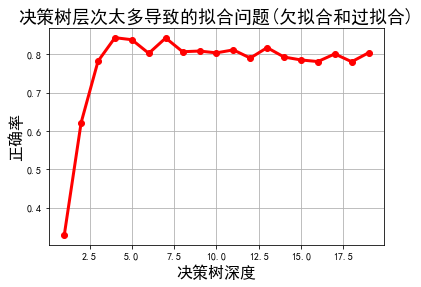

In [40]:
x_train4, x_test4, y_train4, y_test4 = x_train1, x_test1, y_train1, y_test1

depths = np.arange(1, 20)   # 定义不同深度
corr_list = []
for d in depths:
    clf = DecisionTreeRegressor(criterion='mse', max_depth=d)
    clf.fit(x_train4, y_train4)
    
    score1 = clf.score(x_test4, y_test4)
    print ("%d深度，正确率%.5f" % (d, score1))
    
    corr_list.append(score1)

plt.figure(facecolor='w')

plt.plot(depths, corr_list, 'ro-', lw=3)
plt.xlabel('决策树深度', fontsize=16)
plt.ylabel('正确率', fontsize=16)
plt.grid(True)
plt.title('决策树层次太多导致的拟合问题(欠拟合和过拟合)', fontsize=18)
plt.show()